# Part 1: Understanding Logistic Regression

The goal of this part is to understand how logistic regression handle binary classification problems.

We will be using Python libraries such as numpy, matplotlib, scipy, and sklearn. Make sure all these are imported to run the experiment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit  # Sigmoid function
from sklearn.linear_model import LinearRegression, LogisticRegression

We will create a simple toy dataset where the X values are sampled from a Gaussian distribution (normal distribution) with some added noise. The target y will be a binary value (0 or 1), based on whether X is greater than zero.

In [2]:
xmin, xmax = -5, 5
n_samples = 1000  # Number of samples
np.random.seed(1)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)  # Binary classification target

X[X > 0] *= 4  # Scale positive values
X += 0.3 * np.random.normal(size=n_samples)  # Add noise

X = X[:, np.newaxis]  # Reshape X for sklearn compatibility


In [3]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 1)
y shape: (1000,)


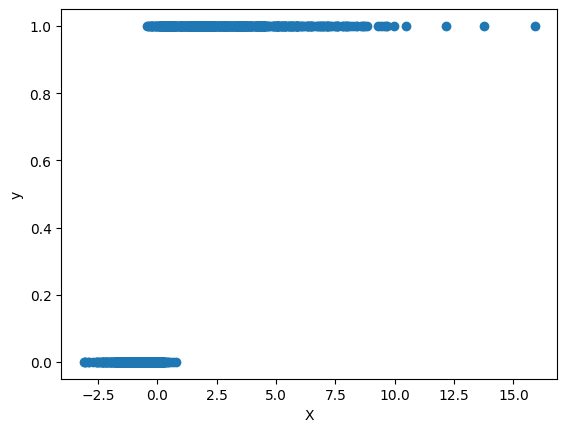

In [4]:
# Visualize the dataset
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Next, we fit a logistic regression model to the data. Logistic regression models the probability that `y=1` given `x`.

In [5]:
logistic_regr = LogisticRegression(C=1e5)  # C=1e5 minimizes regularization to fit more closely
logistic_regr.fit(X, y)

LogisticRegression(C=100000.0)

The logistic function is of the form:
$$p = \frac{1}{1+e^{-(ax+b)}}$$,
where $a$ is the coefficient and $b$ is the intercept.  
$p$ gives the probability that $y=1$ given $x$.

Print the coefficient and the intercept of the trained model:

In [6]:
print("Coefficient (a):", logistic_regr.coef_[0][0])
print("Intercept (b):", logistic_regr.intercept_[0])

Coefficient (a): 5.660714870899554
Intercept (b): -1.2699371722496628


**Open a code cell below, calculate the value of $x$ that gives $p=0.5$.  
Assign this value to the variable `x_threshold`.**

In [17]:
#rearranging the given equation to get x in terms of p, we get:
#x = (ln((1/p)-1)+b)/(-a)

x_threshold = (np.log((1/0.5)-1)+logistic_regr.intercept_[0])/(-logistic_regr.intercept_[0])
print(x_threshold)

-1.0


Now let's plot the logistic regression model, along with its prediction.

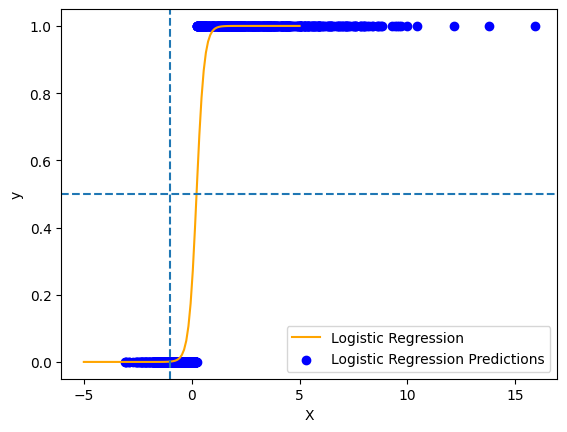

In [9]:
y_pred = logistic_regr.predict(X)

# Create a range of x values for plotting
x_plot = np.linspace(xmin, xmax, 100)

# Calculate the predicted probabilities using the logistic regression model
p_plot = 1 / (1 + np.exp(-(logistic_regr.coef_[0][0] * x_plot + logistic_regr.intercept_[0])))

# Plot the logistic function
plt.plot(x_plot, p_plot, label="Logistic Regression", c='orange')
plt.scatter(X, y_pred, label="Logistic Regression Predictions", c='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Plot dashed lines where p = 0.5, x = x_threshold
plt.axhline(0.5, linestyle='--')
plt.axvline(x_threshold, linestyle='--')
plt.show()

**Open a text cell below, and answer the question:  
How does logistic regression determine the decision boundary between class 0 and class 1?**

ANSWER: the decision boundary is determined by the point when logistic regression becomes any value other than 0. So essentially, anything before the boundary cannot possibly be 1, since the regression itself is still at zero.

Now let's compare the prediction with the original dataset (ground truth).

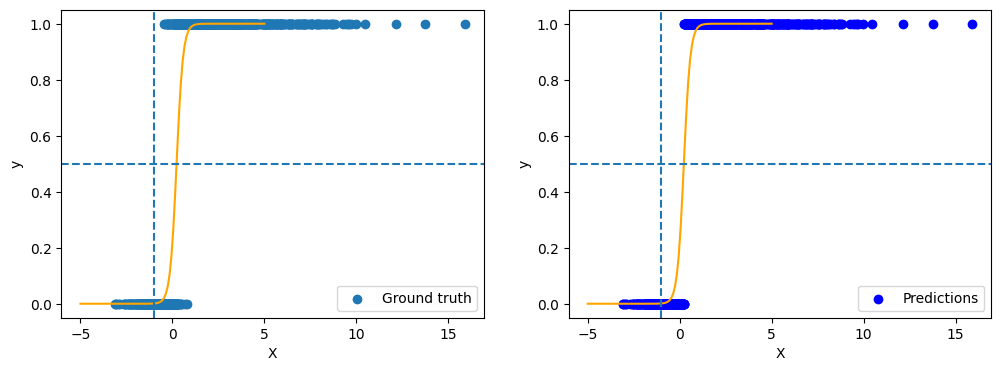

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Create a range of x values for plotting
x_plot = np.linspace(xmin, xmax, 100)

# Calculate the predicted probabilities using the logistic regression model
p_plot = 1 / (1 + np.exp(-(logistic_regr.coef_[0][0] * x_plot + logistic_regr.intercept_[0])))

# Plot the logistic function
ax[0].plot(x_plot, p_plot, c='orange')
ax[0].scatter(X, y, label="Ground truth")
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")
ax[0].axhline(0.5, linestyle='--')
ax[0].axvline(x_threshold, linestyle='--')
ax[0].legend(loc='lower right')

ax[1].plot(x_plot, p_plot, c='orange')
ax[1].scatter(X, y_pred, label="Predictions", c='blue')
ax[1].set_xlabel("X")
ax[1].set_ylabel("y")
ax[1].axhline(0.5, linestyle='--')
ax[1].axvline(x_threshold, linestyle='--')
ax[1].legend(loc='lower right')


**Open a text cell below, and answer the question:  
Does the logistic regression model give 100% accuracy for this dataset? Justify your answer.**

ANSWER: The model does not give 100% accuracy because there are some 1s that occur before the prediction's first 1, and some 0s that occur after the prediction's last 0.

# Part 2: Comparing Logistic Regression with Linear Regression

Using the same datset, let's create a linear regression model.  
**Insert a code cell below, add code to create a linear regression model `linear_regr`, and fit the model with the dataset.**

In [11]:
linear_regr = LinearRegression()
linear_regr.fit(X, y)

LinearRegression()

**Open a text cell below, and answer the question:  
What assumptions does linear regression make about the relationship between X and y?**

ANSWER: it assumes that y is a function of X.

**Open a code cell below, print the coefficient and intercept of the linear regression model**

In [15]:
print("Coefficient (a):", linear_regr.coef_[0])
print("Intercept (b):", linear_regr.intercept_)

Coefficient (a): 0.13965312328711296
Intercept (b): 0.33648732173844353


We now plot both the logistic regression model and the linear regression model on the same graph to compare them.

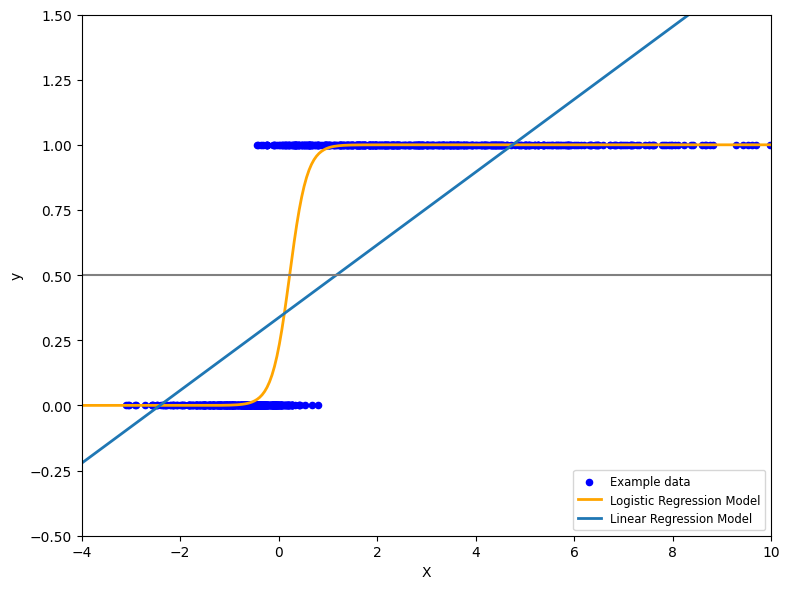

In [16]:
plt.figure(1, figsize=(8, 6))  # Set up figure
plt.scatter(X, y, label="Example data", color="blue", s=20, marker = 'o')  # Scatter plot of the data

X_test = np.linspace(-5, 10, 300)  # Test range for X-axis

# Logistic regression prediction (sigmoid curve)
loss = expit(X_test * logistic_regr.coef_ + logistic_regr.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="orange", linewidth=2)

# Linear regression prediction (straight line)
plt.plot(
    X_test,
    linear_regr.coef_ * X_test + linear_regr.intercept_,
    label="Linear Regression Model",
    linewidth=2,
)

plt.axhline(0.5, color=".5")  # Horizontal line at y=0.5
plt.ylabel("y")
plt.xlabel("X")
plt.ylim(-0.5, 1.5)  # Set y-limits
plt.xlim(-4, 10)  # Set x-limits

plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()


**Open a text cell below, and answer the questions:**
1. What do you observe about the shape of the logistic regression curve compared to the linear regression line?
2. Why does logistic regression's output stay between 0 and 1, whereas linear regression does not?
3. If you were to classify the data into two groups based on the output of the linear regression model, what threshold would you use? How would this threshold compare to the 0.5 threshold in logistic regression?

ANSWERS:
1. The logistic regression curve is s-shaped and fits the data better, while the linear regression is a line that does not fit well at all since the data only has two possible y values
2. the logistic regression uses the Sigmoid Function to ensure all values will remain within a set maximum and minimum, while a linear function simply extends infinitely, meaning it will always leave the bounds unless it is perfectly flat.
3. I would use x = 1 since that is the point at which the line reaches y=0.5. This is on the other side of the y axis compared to the 0.5 threshold in logistic regression.

# Part 3:Customer Churn Prediction (Binary Classification)

In this part of the lab, you will build a logistic regression model to predict customer churn (whether a customer will leave a service). This is a typical binary classification problem. The task will use a dataset with various customer features, and the goal is to predict whether a customer will churn or not (0 = no churn, 1 = churn).



In [18]:
import numpy as np
import pandas as pd
# Sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!ls drive/MyDrive/Telco-Customer-Churn.csv ## please change this to the directory of your own csv file.

drive/MyDrive/Telco-Customer-Churn.csv


Load the dataset and perform some basic exploratory data analysis to understand its structure and key characteristics.

In [73]:
# importing dataset
df = pd.read_csv('drive/MyDrive/Telco-Customer-Churn.csv')

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Column `TotalCharges` is of type `object`, there might be some non-numeric values.  
Let's try to convert column `TotalCharges` to numeric using `pd.to_numeric()`, and set `errors='coerce'` to turn non-numeric values into NaN.

In [76]:
# Convert the TotalCharges column to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Check the datatype of this column again:

In [77]:
print(df['TotalCharges'].dtype)

float64


**Insert a code block below to drop the NaNs in the dataframe**

In [85]:
df.dropna(inplace=True)

In [86]:
# Reset row index after drop some rows
df.reset_index(drop=True, inplace=True)

In [87]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Open a code cell below to drop the column 'customerID', since it's not relevant for predicting customer churn.**

In [88]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Check the values in column `Churn`:

In [89]:
df['Churn'].unique()

array([0, 1])

Column `Churn` contains values of `No` or `Yes`. Let's convert them to numerical values `0` or `1`.

In [90]:
# Convert 'Churn' column to numerical values: No -> 0, Yes -> 1
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

# Verify the datatype of 'Churn' column
df['Churn'].dtype

dtype('int64')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Let's start with a logistic regresion model with only one feature.  
**Use the TotalCharges feature to predict customer churn. Insert code cells below, create a dataset (X, y) with this feature, and Churn as label. Split the dataset into 70% training and 30% testing.**

In [101]:
# Prepare data
X = df['TotalCharges'].values.reshape(-1, 1)
y = df['Churn']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7341232227488151

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Insert a code cell below. Create a logistic regression model, train the model with the training set, and predict on the testing set.**

In [102]:
logistic_regr = LogisticRegression(C=1e5)  # C=1e5 minimizes regularization to fit more closely
logistic_regr.fit(X_train, y_train)
logistic_regr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Let's look at the accuracy:

In [103]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 73.41%
Confusion Matrix:
[[1549    0]
 [ 561    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Question: Compared with the accuracy score, how does the confusion matrix help you understand the model's performance?**

ANSWER:
While the accuracy tells me how good the model is overall, the confusion matrix shows how many true positives, false positives, true negatives, and false negatives there were. This allows me to have a better understanding of the actual problem, which in this case seems to be that the model always predicts a positive.

Now we use all numerical columns in the original dataframe.

In [100]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


**Insert code cells below and do the following:   
Create a dataset with the above numerical feature. Split the dataset into 70% training and 30% testing.  
Create a logistic regression model, train the model with the training set, and predict on the testing set.  
Calculate the prediction accuracy.**

In [114]:
#prepare data
X = df_numerical.drop('Churn', axis=1)
y = df_numerical['Churn']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7805687203791469
Confusion Matrix:
[[1401  148]
 [ 315  246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



**Question: Is the performance improved compared with the previous model with only one feature? Justify your answer**

ANSWER:
The performance is improved since the accuracy increased and now it is not only predicting positives.

Now let's use all the features in the dataframe.

In [106]:
# Loop through all columns with 'object' dtype
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")


Unique values in 'customerID' column: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender' column: ['Female' 'Male']
Unique values in 'Partner' column: ['Yes' 'No']
Unique values in 'Dependents' column: ['No' 'Yes']
Unique values in 'PhoneService' column: ['No' 'Yes']
Unique values in 'MultipleLines' column: ['No phone service' 'No' 'Yes']
Unique values in 'InternetService' column: ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity' column: ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup' column: ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection' column: ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport' column: ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV' column: ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies' column: ['No' 'Yes' 'No internet service']
Unique values in 'Contract' column: ['Month-to-month' 'One year' 'Two yea

The following code converts all categorical columns into numerical.

In [107]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

df_categorical = df_categorical.astype('int')


df_categorical.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [108]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Columns: 7068 entries, gender to PaymentMethod_Mailed check
dtypes: int64(7068)
memory usage: 379.2 MB


In [109]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   tenure          7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
 4   Churn           7032 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 274.8 KB


Apply a standard scaler to the features.

In [110]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col!='Churn']
df_std = pd.DataFrame(StandardScaler().fit_transform(df_numerical[numerical_cols].astype('float64')), columns=numerical_cols)
df_std.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457


In [111]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   float64
 1   tenure          7032 non-null   float64
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(4)
memory usage: 219.9 KB


Combine the numerical and categorical columns together.

In [112]:
df_processed = pd.concat([df_std, df_categorical], axis=1)
df_processed['Churn'] = df_numerical['Churn'].astype(int)
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,customerID_0002-ORFBO,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
3,-0.440327,0.512486,-0.747850,-0.195248,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,-0.440327,-1.239504,0.196178,-0.940457,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [113]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Columns: 7073 entries, SeniorCitizen to Churn
dtypes: float64(4), int64(7069)
memory usage: 379.5 MB


**Insert code cells below and do the following:   
Create a dataset using a above dataframe, with `Churn` as label, and all other columns as feature.  
Split the dataset into 70% training and 30% testing.  
Create a logistic regression model, train the model with the training set, and predict on the testing set.  
Calculate the prediction accuracy.**

In [115]:
#create dataset with all features
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

#split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict on the testing set
y_pred = model.predict(X_test)

#calculate prediction accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.795734597156398

Confusion Matrix:
 [[1380  169]
 [ 262  299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Question: Open a text cell below, summarize and compare the performance of 1. model with only one feature; 2. model with four numerical features; 3. model with all features. Please share your observation and insights.**

ANSWER:
the model with only 1 feature had good accuracy, but that was because it only ever predicted positive and there were mostly positives in the test data. The model with 4 features was better because it was both more accurate and actually made predictions other than guessing positive. The model with all features was the best for the same reason as the model with 4 features.

Lab 5 is now complete.  Make sure all cells are visible and have been run (rerun if necessary).

The code below converts the ipynb file to PDF, and saves it to where this .ipynb file is.

In [ ]:
NOTEBOOK_PATH = # Enter here, the path to your notebook file, e.g. "/content/drive/MyDrive/ECEN250/ECEN250_Lab5.ipynb". Do not change the lines below, and make sure you do not have multiple notebooks with the same path.
! pip install playwright
! jupyter nbconvert --to webpdf --allow-chromium-download "$NOTEBOOK_PATH"

Download your notebook as an .ipynb file, then upload it along with the PDF file (saved in the same Google Drive folder as this notebook) to Canvas for Lab 5. Make sure that the PDF file matches your .ipynb file.